In [3]:
import numpy as np

#### Neural network with input size of 4 and 6 hidden layers and 3 output size/layers

In [4]:
input_layer = 4
hidden_layer = 6
output_layer = 3

#####  Initialize wieghts and biases to 1

In [5]:
weights_1 = np.ones((input_layer, hidden_layer))
bias_1 = np.ones((1,hidden_layer))
weights_2 = np.ones((hidden_layer, output_layer))
bias_2 = np.ones((1, output_layer))

#### define activation using using sigmoid function
$ f(x) = \frac{1}{1 + \exp(-x)}$

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

##### def derivative of sigmoid function

In [7]:
def sigmoid_dt(x):
    return x*(1-x)

##### define the learning rate as 0.1

In [8]:
lr= 0.1

#### input and target values from standard input

In [9]:
input_values = [-3,2,1,-1]
target_values = [1,0,0]

In [10]:
#convert the input and target list to numpy arrs
input_arr = np.array(input_values)
target_arr = np.array(target_values)

#reshape the input array to a row vector
input_arr = input_arr.reshape((1, input_arr.shape[0]))

##### Feedforward step to compute initial output values

In [11]:
hidden_layers = sigmoid(np.dot(input_arr, weights_1)+bias_1)
output_layers = sigmoid(np.dot(hidden_layers, weights_2)+bias_2)

##### compute the initial loss value

$L = \frac{1}{2}\sum_{i=1}^{n}(y_i - t_i)^2$

In [12]:
loss = 0.5 *np.sum(np.square((output_layers - target_arr))) 
loss

0.9645128356990176

##### Backpropagation to update weights and biases

In [13]:
output_err = (output_layers - target_arr) * sigmoid_dt(output_layers)
hidden_err = np.dot(output_err, weights_2.T)* sigmoid_dt(hidden_layers)
weights_2-= lr*np.dot(hidden_layers.T, output_err)
bias_2 -= lr * np.sum(output_err, axis=0, keepdims=True)
weights_1 -= lr * np.dot(input_arr.T, hidden_err)
bias_1 -= lr * np.sum(hidden_err, axis=0)

##### Feedforward step to compute updated output values

In [14]:
hidden_layers = sigmoid(np.dot(input_arr, weights_1)+ bias_1)
output_layers = sigmoid(np.dot(hidden_layers, weights_2)+ bias_2)

###### compute updated loss value

In [15]:
updated_loss = np.sum(np.square(output_layers-target_arr)) * .5

##### print the initial and updated loss  values

In [16]:
print(round(float(loss.flatten()[0]), 4), round(float(updated_loss.flatten()[0]), 4))


0.9645 0.9636


#### Visualization 

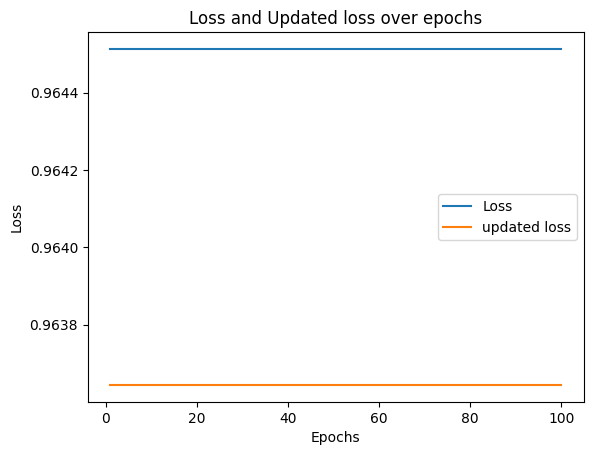

In [17]:
import matplotlib.pyplot as plt

losses = []
updated_losses = []
num_epochs = 100
for epoch in range(num_epochs):
    losses.append(loss)
    updated_losses.append(updated_loss)
epochs = range(1, num_epochs+1)
plt.plot(epochs, losses, label='Loss')
plt.plot(epochs, updated_losses, label='updated loss')
plt.title('Loss and Updated loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()